In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import spdiags, csc_matrix
from scipy.sparse.linalg import spsolve
from matplotlib.animation import FuncAnimation

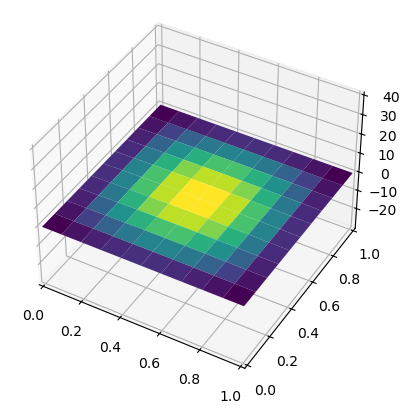

In [2]:
J = 10  # pasos espaciales 
TF = 1
N = 450  # pasos temporales 

L = 1  

k = TF / N
h = L / J

X = np.linspace(0, L, J+1)
Y = np.linspace(0, L, J+1)


r = k / (h ** 2)

B = np.zeros(((J-1)**2, 5))  # matriz que va a guardar en sus columnas las diagonales de A
B[:((J-1)**2-(J-1)), 0] = r
B[:(J-1)**2-1, 1] = r
for i in range(1, J-1):
    B[i*(J-1)-1, 1] = 0
B[:, 2] = 1 - 4 * r
B[1:(J-1)**2, 3] = r  # las supradiagonales se toman desde abajo
for i in range(1, J-1):
    B[i*(J-1), 3] = 0
B[(J-1):(J-1)**2, 4] = r  # las supradiagonales se toman desde abajo
d = [-(J-1), -1, 0, 1, J-1]  # diagonales en las que van las columnas de B

# Convertimos la matriz dispersa a formato CSC (Columnar Compressed Sparse)
A = spdiags(B.T, d, (J-1)**2, (J-1)**2).tocsc()

u = np.zeros((J-1, J-1))

# Función inicial
g = lambda x, y, t: 30*np.sin(2*np.pi*x*y)


for i in range(J-1):
    for j in range(J-1):
        u[i, j] = g(X[i+1], Y[j+1], 0)  # a tiempo t0

u = u.T.reshape((J-1)*(J-1))

u = np.column_stack((u,A.dot(u)))

for n in range(2, N ):
    v = A.dot(u[:,n-1])
    u = np.column_stack((u,v))

U = np.zeros((J+1, J+1, N+1))

for n in range(N):
    U[1:J, 1:J, n] = u[:, n].reshape((J-1, J-1))

mx = np.max(U)+10
mn = np.min(U)

X1, Y1 = np.meshgrid(X, Y)

# Configuración de la figura
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlim([0, L])
ax.set_ylim([0, L])
ax.set_zlim([mn, mx])

# Ajuste del ángulo de la vista
ax.view_init(elev=40)

# Inicialización de la superficie
surf = ax.plot_surface(X1, Y1, U[:, :, 0], cmap='viridis')

# Función de actualización para la animación
def update(j):
    global surf
    # Eliminar la superficie anterior
    surf.remove()
    # Dibujar la nueva superficie
    surf = ax.plot_surface(X1, Y1, U[:, :, j], cmap='viridis')
    return surf,

# Crear la animación
anim = FuncAnimation(fig, update, frames=int(N/5), interval=10, blit=False)

# Guardar la animación como un archivo de video
anim.save('wave_simulation.mp4', writer='ffmpeg', fps=5)

# Mostrar la animación
plt.show()

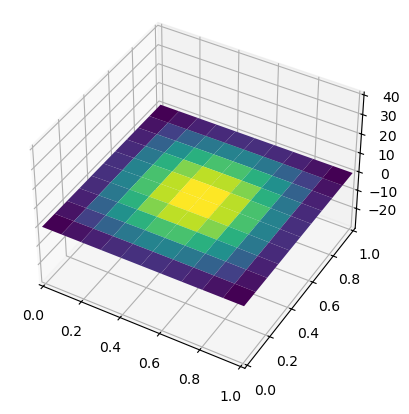

In [3]:
B = np.zeros(((J-1)**2, 5))  # matriz que va a guardar en sus columnas las diagonales de A
B[:((J-1)**2-(J-1)), 0] = -r
B[:(J-1)**2-1, 1] = -r
for i in range(1, J-1):
    B[i*(J-1)-1, 1] = 0
B[:, 2] = 1 + 4 * r
B[1:(J-1)**2, 3] = -r  # las supradiagonales se toman desde abajo
for i in range(1, J-1):
    B[i*(J-1), 3] = 0
B[(J-1):(J-1)**2, 4] = -r  # las supradiagonales se toman desde abajo
d = [-(J-1), -1, 0, 1, J-1]  # diagonales en las que van las columnas de B

# Convertimos la matriz dispersa a formato CSC (Columnar Compressed Sparse)
A = spdiags(B.T, d, (J-1)**2, (J-1)**2).tocsc()

u = np.zeros((J-1, J-1))

for i in range(J-1):
    for j in range(J-1):
        u[i, j] = g(X[i+1], Y[j+1], 0)  # a tiempo t0

u = u.T.reshape((J-1)*(J-1))

u = np.column_stack((u,spsolve(A, u)))

for n in range(2, N ):
    v = spsolve(A,u[:,n-1])
    u = np.column_stack((u,v))

U = np.zeros((J+1, J+1, N+1))

for n in range(N):
    U[1:J, 1:J, n] = u[:, n].reshape((J-1, J-1))

mx = np.max(U)+10
mn = np.min(U)

X1, Y1 = np.meshgrid(X, Y)

# Configuración de la figura
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlim([0, L])
ax.set_ylim([0, L])
ax.set_zlim([mn, mx])

# Ajuste del ángulo de la vista
ax.view_init(elev=40)

# Inicialización de la superficie
surf = ax.plot_surface(X1, Y1, U[:, :, 0], cmap='viridis')

# Función de actualización para la animación
def update(j):
    global surf
    # Eliminar la superficie anterior
    surf.remove()
    # Dibujar la nueva superficie
    surf = ax.plot_surface(X1, Y1, U[:, :, j], cmap='viridis')
    return surf,

# Crear la animación
anim = FuncAnimation(fig, update, frames=int(N/5), interval=10, blit=False)

# Guardar la animación como un archivo de video
anim.save('wave_simulation_implicit.mp4', writer='ffmpeg', fps=5)

# Mostrar la animación
plt.show()